### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('GOOGLE_TRAIN_DATA.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential()

Metal device set to: Apple M1


### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 78, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 78, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 78, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100


2023-05-29 15:00:48.711352: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


38/38 [==============================] - 8s 47ms/step - loss: 0.0156
Epoch 2/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0017
Epoch 3/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0012
Epoch 4/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0013
Epoch 5/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0016
Epoch 6/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0011
Epoch 7/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0011
Epoch 8/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0012
Epoch 9/100
38/38 [==============================] - 1s 28ms/step - loss: 0.0010
Epoch 10/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0012
Epoch 11/100
38/38 [==============================] - 1s 29ms/step - loss: 9.2165e-04
Epoch 12/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0012
Epoch 13/100
38/38 [=============

38/38 [==============================] - 1s 27ms/step - loss: 2.4094e-04
Epoch 98/100
38/38 [==============================] - 1s 27ms/step - loss: 2.9537e-04
Epoch 99/100
38/38 [==============================] - 1s 27ms/step - loss: 3.0290e-04
Epoch 100/100
38/38 [==============================] - 1s 27ms/step - loss: 2.6106e-04


### Getting the real stock price of 2017

In [18]:
dataset_test = pd.read_csv('GOOGLE_TEST_DATA.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


### Getting the predicted stock price of 2022 January

In [24]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)

inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
for i in range(20):
    print(real_stock_price[i],predicted_stock_price[i])

1/1 [==============================] - 0s 54ms/step
[2901.100098] [2848.1487]
[2907.919922] [2840.1357]
[2888.399902] [2840.0166]
[2739.969971] [2834.376]
[2762.909912] [2776.6157]
[2701.560059] [2751.647]
[2760.139893] [2722.3682]
[2823.] [2728.4097]
[2830.800049] [2758.1587]
[2741.580078] [2775.0674]
[2723.5] [2745.0083]
[2730.469971] [2716.1887]
[2725.] [2705.4297]
[2651.870117] [2701.746]
[2519.560059] [2674.3296]
[2574.800049] [2609.1138]
[2622.379883] [2589.154]
[2626.080078] [2605.8455]
[2593.179932] [2620.731]
[2683.23999] [2612.8284]


### Visualising the results

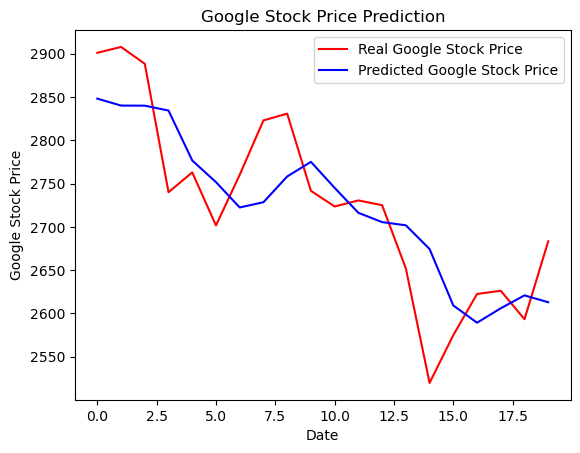

In [21]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()